# Class Work - Fourier Transforms
This notebook will be a brief introduction to Fourier Transforms (FT) and their uses in astronomy. The Fourier Transform is one of the most important tools in any sort of signal processing you might be carying out. Developed in the early 1800s to aid in the describe the flow of heat, the Fourier transform allows you to break down *any* signal as a series of sine waves. The key concept to recognize with a FT is that it transforms your data from the time-domain to the frequency-domain. That is to say that if your data represents a seriese of measurments through time (such as a light curve in astronomy) the FT of that data will represent the contributing power of frequencies for that signal. A peak in the FT at some frequency means that frequency strongly contributes to the overall shape of the signal.

We will break this project down into two sections, an analytical section and a practical section. The analytical section will introduce you to Fourier Transforms, how to solve them for some defined function, $f(t)$, and how to understand what they imply. The practical section will introduce you to tools you can use to decompose time series data into frequency space data as as astronomer. 

This notebook was written by Emily Boudreaux for A74 in F24.


# The Fourier Transform
Fourier transforms take some function, $f(t)$, and decompose it to frequency components. Fourier originally found two forms of the Fourier Transform. The cosine transform

$$
F(\omega) = \frac{2}{\pi}\int_{0}^{\infty}f(t)\cos(\omega t)dt 
$$
$$
f(t) = \int_{0}^{\infty}F(\omega)\cos(\omega t)d\nu
$$

and the sine transformation.

$$
F(\omega) = \frac{2}{\pi}\int_{0}^{\infty}f(t)\sin(\omega t)dt 
$$
$$
f(t) = \int_{0}^{\infty}F(\omega)\sin(\omega t)d\nu
$$

Much more commonly today we will use Euler's Forumula to build a slightly more general definition which, incidently, is also often simpler to integrate.

First Recall Euler's Formula
$$
e^{i\theta} = \cos(\theta) + i\sin(\theta)
$$
We can then use this to pull out the strength of a function at some frequency...

$$
F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt
$$
$$
f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}F(\omega)e^{i\omega t}d\omega
$$

Lets think about what this is doing. Note how the form of the fourier transform is a projection (or inner product) of $f(t)$ onto $e^{i\omega t}$. In the FT $e^{-i \omega t}$ acts as a probe as to the strength of $f(t)$ at frequency $\omega$. That is to say that $|F(\omega)|$ is the magnitude of $f(t)$ at $\omega$.

One might expect that simple example of this would be to take the fourier transform of a sine wave

$$
\begin{align}
f(t) &= \sin(\omega_{0} t) \\
F(\omega) &= \int_{-\infty}^{\infty}\sin(\omega_{0} t)e^{-i\omega t}dt
\end{align}
$$

However, if you were to try to work through this in the most straightforward manner you will find that this integral does not converge. This should make sense as $\sin(\omega t)$ oscillates forever and therefore there is infinite area under this curve. However, we can also intuitivley understand that the frequency space transformation of a sine wave should have the form of a dirac delta function, $\delta(\omega)$. In order to find this we need to decompose the $f(t)$ using Euler's formula

$$
\begin{align}
    \sin(\omega_{0} t) &= \frac{e^{i\omega_{0}t} - e^{-i\omega_{0}t}}{2i} \\
    F(\omega) &= \int_{-\infty}^{\infty}\frac{e^{i\omega_{0}t} - e^{-i\omega_{0}t}}{2i}e^{-i\omega t}dt \\
    F(\omega) &= \frac{1}{2i}\left(\int_{-\infty}^{\infty}e^{i(\omega_{0}-\omega)t}dt - \int_{-\infty}^{\infty}e^{-i(\omega_{0}+\omega)t}dt\right)
\end{align}
$$

Now recall the dirac delta function (distribution), $\delta(\alpha)$,
$$
\delta(\alpha) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{it\alpha}dt \hspace{1cm} \delta(\alpha) = \begin{cases}
\infty & \alpha = 0 \\
0 & \alpha \neq 0
\end{cases}
$$
Note how this is similar to the form we have in our fourier integrand with $\alpha=\omega_{0} - \omega$ and $\alpha=-\omega_{0}-\omega$. Therefore
$$
\begin{align}
F(\omega) &= \frac{1}{2i}\left(2\pi\delta(\omega_{0}-\omega) - 2\pi\delta(-\omega_{0}-\omega)\right)\\
F(\omega) &= \frac{\pi}{i}\left(\delta(\omega_{0}-\omega) - \delta(-\omega_{0}-\omega)\right)
\end{align}
$$
The dirac delta function is only non zero when $\alpha=0$, therefore when
$$
\begin{align}
\omega_{0} - \omega &= 0 \\
\omega_{0} &= \omega
\end{align}
$$
and
$$
\begin{align}
-\omega_{0} - \omega &= 0 \\
-\omega_{0} &= \omega
\end{align}
$$
So we can see that the only frequencies where this function does not evlauate to 0 are $\omega=\pm\omega_{0}$. This is the original frequency we may have expected and that same frequency reflected about $\omega=0$. Note how this would not have been solvable without invoking the dirac delta function. The fourier transform (without the dirac delta function) is therefore only usable on functions, $f(t)$, where
$$
\lim_{t\rightarrow\infty}f(t) = 0
$$
and
$$
\lim_{t\rightarrow-\infty}f(t) = 0
$$
However, by incorperating $\delta$ we are able to evlatute the fourier transform for a much wider set of functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def diracDelta(alpha):
    if alpha==0:
        return 1
    else:
        return 0

## Q1. Computing FT's anaytically (4 pts)
Find the fourier transform (either by hand or using CAS systems such as mathematica or sympy. However, you may not simply ask a CAS to find the fourier transform of the function [i.e. you may use it for algebra and calculus]) of the following function. Make a plot of both $f(t)$ and $F(\omega)$. Does the frequency space representation make sense given the form of $f(t)$? What frequencies do you find compose $f(t)$?

$$
f(t) = \sin(2\pi t) + \cos\left(\frac{4\pi\omega_{0}}{3}t\right)
$$

**Your answer here** (double click to edit):


f(t) is composed of four waves, two of frequency +/-$2\pi$ and two of frequency +/-$\frac{4\pi \omega_0}{3}t$. The frequency space representation therefore selects only these frequencies and sets all others to 0, which is what we see in the plot. 
We can obtain $F(\omega)$ numerically by breaking $f(t)$ up into two functions and expressing each of the functions in terms of the Dirac delta function defined above.
$$
f_1(t) = \sin{(2\pi t)} = \frac{e^{2\pi i t} - e^{-2\pi i t}}{2 i} \\
F_1(\omega) = \frac{1}{2 i}\int_{-\infty}^{\infty} (e^{2\pi i t} - e^{-2\pi i t})e^{-i\omega t}\\
F_1(\omega) = \frac{1}{2 i}  \int_{-\infty}^{\infty} e^{it(2\pi-\omega )} - e^{-it(2\pi + \omega)}\\
F_1(\omega) = \frac{1}{2 i}(2\pi \delta{(2\pi-\omega )} - 2\pi\delta{(-2\pi - \omega)})\\
F_1(\omega) \frac{\pi}{i}(\delta{(2\pi-\omega )} - \delta{(-2\pi - \omega)})
$$
Here, $\alpha = \pm 2\pi - \omega $, so $\alpha = 0$ when $\omega = \pm 2\pi$

$$f_2(t) = \cos\left(\frac{4\pi\omega_{0}}{3}t\right) = \frac{(e^{\frac{4\pi\omega_0}{3}it} + e^{-\frac{4\pi\omega_0}{3}it})}{2} \\
F_2(\omega) = \frac{1}{2} \int_{-\infty}^{\infty} (e^{\frac{4\pi\omega_0}{3}it} + e^{-\frac{4\pi\omega_0}{3}it}) e^{-i \omega t}\\
F_2(\omega) = \frac{1}{2} \int_{-\infty}^{\infty} e^{it(\frac{4\pi\omega_0}{3} - \omega)} + e^{-it(\frac{4\pi\omega_0}{3} + \omega)}\\
F_2(\omega) = \frac{1}{2}(2\pi\delta{(\frac{4\pi\omega_0}{3} - \omega)} + 2\pi \delta{(-\frac{4\pi\omega_0}{3} - \omega)})\\
F_2(\omega) = \pi (\delta{(\frac{4\pi\omega_0}{3} - \omega)} + \delta{(-\frac{4\pi\omega_0}{3} - \omega)})
$$
Here, $\alpha = \pm \frac{4\pi\omega_0}{3} - \omega$, so $\alpha = 0$ when $\omega = \pm \frac{4\pi\omega_0}{3}$

$$
F(\omega) = F_1(\omega) + F_2(\omega) \\
F(\omega) = \frac{\pi}{i}(\delta{(2\pi-\omega )} - \delta{(-2\pi - \omega)}) + \pi (\delta{(\frac{4\pi\omega_0}{3} - \omega)} + \delta{(-\frac{4\pi\omega_0}{3} - \omega)})
$$

To handle the imaginary number, we can multiply $F(\omega)$ by its complex conjugate: 
$$
F(\omega)* = - \frac{\pi}{i}(\delta{(2\pi-\omega )} - \delta{(-2\pi - \omega)}) + \pi (\delta{(\frac{4\pi\omega_0}{3} - \omega)} + \delta{(-\frac{4\pi\omega_0}{3} - \omega)})\\
F(\omega)F(\omega)* = \pi^2[\delta(2\pi - \omega)^2 - 2\delta(2\pi - \omega)\delta(-2\pi - \omega) + \delta(-2\pi - \omega)^2 + 
\delta(\frac{4\pi \omega_0}{3} - \omega)^2 + 2\delta(\frac{4\pi \omega_0}{3} - \omega)\delta(-\frac{4\pi \omega_0}{3} - \omega)  + \delta(-\frac{4\pi \omega_0}{3} - \omega)^2]
$$

We can now plot $F(\omega)F(\omega)*$ (see below) and see that the function is always zero excpet for when $\omega = \pm 2\pi, \pm \frac{4\pi \omega_0}{3}$. Therefore, these are the frequencies that compose $f(t)$

[Text(-6.283185307179586, 0, '$-2\\pi$'),
 Text(-4.71238898038469, 0, '$-\\frac{3\\pi}{2}$'),
 Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(-1.5707963267948966, 0, '$-\\frac{\\pi}{2}$'),
 Text(0.0, 0, '$0$'),
 Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$\\frac{3\\pi}{2}$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

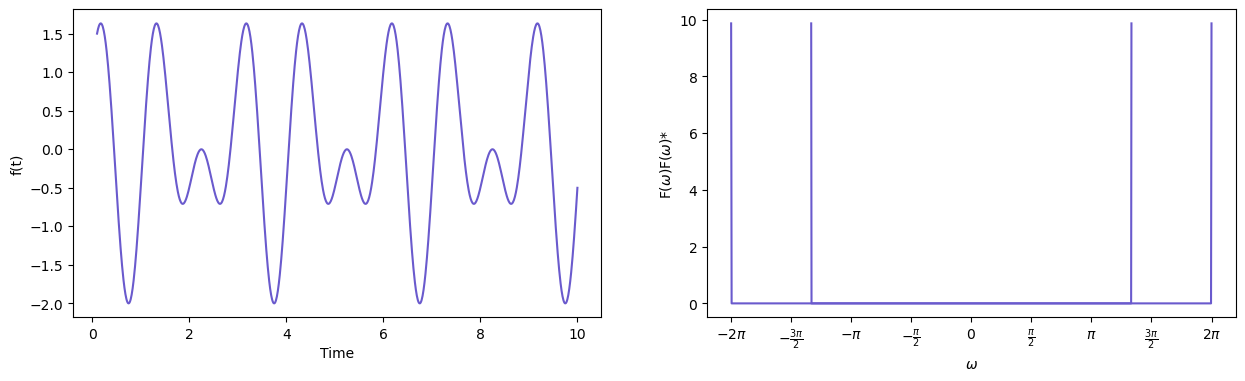

In [2]:
t = np.linspace(0.1, 10, 1000)
def ft(t): 
    return np.sin(2*np.pi * t) + np.cos(4*np.pi * omega0/3 * t)
omega0=1
def Fw(omega): 
    Fw1 = diracDelta(2*np.pi - omega)**2 - 2* diracDelta(2*np.pi - omega) * diracDelta(-2*np.pi - omega) + diracDelta(-2*np.pi - omega)**2
    Fw2 = diracDelta(4*np.pi * omega0/3 - omega)**2 + 2* diracDelta(4*np.pi * omega0/3 - omega) * diracDelta(-4*np.pi * omega0/3 - omega) + diracDelta(-4*np.pi * omega0/3 - omega)**2
    return np.pi**2 * (Fw1 + Fw2)
omega1 = np.linspace(-2*np.pi, 2*np.pi, 1000)
omega2 = np.linspace(-4*np.pi*omega0/3,4*np.pi*omega0/3, 1000)

fig, ax = plt.subplots(1,2, figsize = (15,4))
ax[0].plot(t, ft(t), c = 'slateblue')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('f(t)')
ax[1].plot(omega1, Fw(omega1), c = 'slateblue')
ax[1].plot(omega2, Fw(omega2), c= 'slateblue')
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel(r'F($\omega$)F($\omega$)*')
pi = np.pi
ax[1].set_xticks(np.arange(-2*pi, 2.1*pi, pi/2))
ax[1].set_xticklabels([
    r'$-2\pi$', r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$',
    r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'
])

# Transforming time series data into frequency space
## Building a periodigram
Included in this class work there is a file called lc.dat. Read this file in with python. You can use any parsing scheme you want; however, I recomend pandas here. After you read in the data plot it so you can see what it looks like in the time domain.

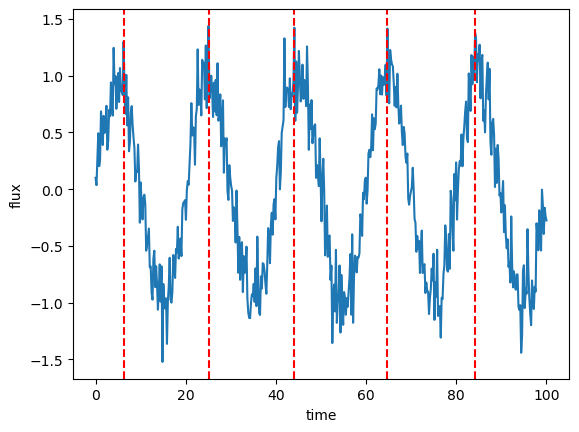

In [3]:
import pandas as pd
lc = pd.read_csv("lc.dat")
plt.plot(lc['time'], lc['flux'])
plt.xlabel('time')
plt.ylabel('flux')
from scipy.signal import find_peaks
peaks, properties = find_peaks(lc['flux'], height=1.1, distance= 15)
for p in peaks: 
    plt.axvline(lc['time'][p], linestyle = '--', color = 'red')
period = np.median(np.diff(lc['time'][peaks]))

Now we need to bring in the libraries for computing the periodigram. Both scipy and astropy include periodigram methods. Here we will use the Lombscargle periodigram from astropy (mostly cause it is a bit more user friendly). The scipy routine can sometimes be more general so that is good to be familar with as well.

In [4]:
from astropy.timeseries import LombScargle
from scipy import signal

Take some time now to go to the <a href="https://docs.astropy.org/en/stable/timeseries/lombscargle.html">astropy documentation</a> (also <a href="https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle">more docs here</a>)and read about how LombScargle is used. **Being able to comfortably read the documentation of external libraries is an important skill to develop!** There is *a lot* of information in the astropy documentation pages, you do not need to absorb all of it. What I want you to focus on is the practicalities of how this object is used. Pay particular attention to what the arguments to the object are and what methods (functions) you can call on the object. When you are learning to use a new piece of code these are often the first and most important things you want familiarize yourself with.

It is **okay** if the documentation is hard to parse through and you have questions! That is totally normal. Like any skill it takes practice. Please come to me when/if you have questions.

Once you have spent some time looking through the documentation for the LombScargle periodiogram try to make a periodigram from the data you read in! What you should see is one peak.


f = 0.048 +/- 0.07655310621242459


/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


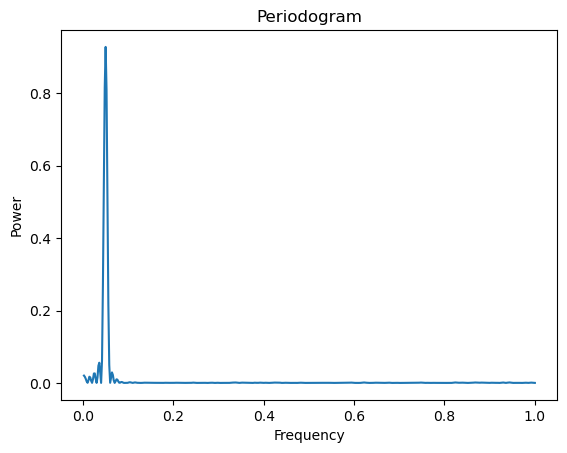

In [5]:
ls = LombScargle(lc['time'], lc['flux'], fit_mean=True, nterms=1)
freq, power = ls.autopower(
    minimum_frequency=0,
    maximum_frequency=1,  
    normalization='standard'  
)
expected_freq = 1/period
plt.plot(freq, power, zorder = 3)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram')
m = np.isnan(power) == False
acc_freq = freq[np.argmax(power[m])]
err = np.abs((acc_freq - expected_freq)/expected_freq)
print(f"f = {acc_freq} +/- {err}")

## Q2. Interpreting FTs (1 pts)
What is the *period* of the variablility in this light curve? Does this agree with what you would expect from the time series data?

**Your answer here** (double click to edit):

From the light curve, I determine the period to be 19.24 (seconds?). Using the periodogram, I find that the power is maximal when the frequency = 0.048. The period is therefore $T = \frac{1}{f} = 20.83$, which visually aligns with the time series data. 

## Q3. Window Function (1 pt)
Recall when we calculated the fourier transform of a signal analytically we saw that at the frequencies needed to reporoduce the signal there were dirac delta functions and everywhere else the fourier transform of the function evaluated to 0. Note how that is not the case here. There is a primary peak in frequency space; however, it has some finite width to it and the function is never truley zero. Explain why this is. Note that there are two primary effects at play here. For this question feel free to google around, the search terms discrete fourier transforms and window funtions will get you some relevant results. Also consider the other parts of the synthetic data (aside from just the clear signal).

**Your answer here** (double click to edit):

When calculating the fourier transform analytically, we bring in the dirac delta function to handle the infinite sum that appears. However, in reality, fourier transforms are discrete (e.g., a sum over a finite time). Computer algorithms and equiptment often compute discrete fourier transforms using some fast fourier transform (FFT) variation. FFTs essentially deconstruct a signal into its frequency components, but, of course, there is a limit to the order of the approximation that can be made. So, a simple sine function can be deconstructed quite easily and accurately, but more complicated functions may not be deconstructed to the same level of accuracy. Furthermore, when handling a real signal, discontinuities can occur and, since FFT is ill-equipped to handle them, it can appear that the energy from one frequency band is leaking into the others. However, with a window function, the discontinuity can be corrected and an FFT can still be applied. 

## Q4. Limits of FTs (1 pt)
Are there any limits of using freqency space you can think of, just list anything you can think of! 

**Your answer here** (double click to edit):

1. Because FTs are a transform from time to frequency space, they are excellent at decomposing a steady signal into its distinct components, but, if the frequency components are changing in time, FTs cannot describe the time when certain frequencies occur--they'll just broaden to encapsulate a wider range of frequencies. 

2. As discussed briefly above, FTs cannot handle data with discontinuities. So, the FT of data that has been sampled over uneven time stamps will contain "leakage" from one frequency band into another. The data will need to be multiplied by a window function to correct this. 

3. Harmonics can appear at $2f_0, 3f_0...$ where $f_0$ is the fundamental frequency. These harmonics are lower in power than the fundamental frequency, but when mixed with a noisy signal can become confusing and difficult to distinuish.

## Q5. Trends in Google Search Data (3 pts)

<a href="https://trends.google.com/trends/">Google Trends</a> allows a user to view some normalized version of search interest over time. Try to think of a topic which might have a periodic trend in its search interest (for example "Olympics"). Use the Google Trends form to pull up the information on your search then download it and generate a periodigram for it. Do you see a periodic trend in frequency space? Does it agree with what you expected? Do you see any additional trends in the data which you might not have expected? 

Next, use the trends view to pull up information on a search term which you think that would not exhibit periodic behavior. Use the tools you have learned to generate a periodigram for this data. Do you see any trends which you did not expect? What does the periodigram look like for non periodic behavior? 

In [108]:
mc = pd.read_csv('mariah_carey.csv', index_col = None, header = 1)

In [109]:
mc['All I Want for Christmas Is You: (United States)'] = pd.to_numeric(mc['All I Want for Christmas Is You: (United States)'], errors='coerce')

In [110]:
mc_clean = mc[np.isnan(mc['All I Want for Christmas Is You: (United States)']) == False]


In [111]:
mc_clean['Month'] = pd.to_datetime(mc_clean['Month'])
first_date = mc_clean['Month'].min() 
t= (mc_clean['Month'].dt.year - first_date.year) * 12 + (mc_clean['Month'].dt.month - first_date.month)

/var/folders/2z/y_y_51l51r1cdd9b0xsl_qj80000gn/T/ipykernel_86418/1136529729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_clean['Month'] = pd.to_datetime(mc_clean['Month'])


Text(0, 0.5, 'Interest')

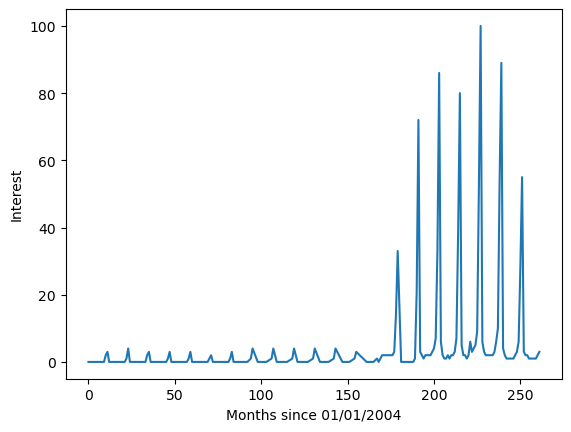

In [117]:
fig, ax = plt.subplots()
ax.plot(t, mc_clean['All I Want for Christmas Is You: (United States)'])
plt.xlabel('Months since 01/01/2004')
plt.ylabel('Interest')

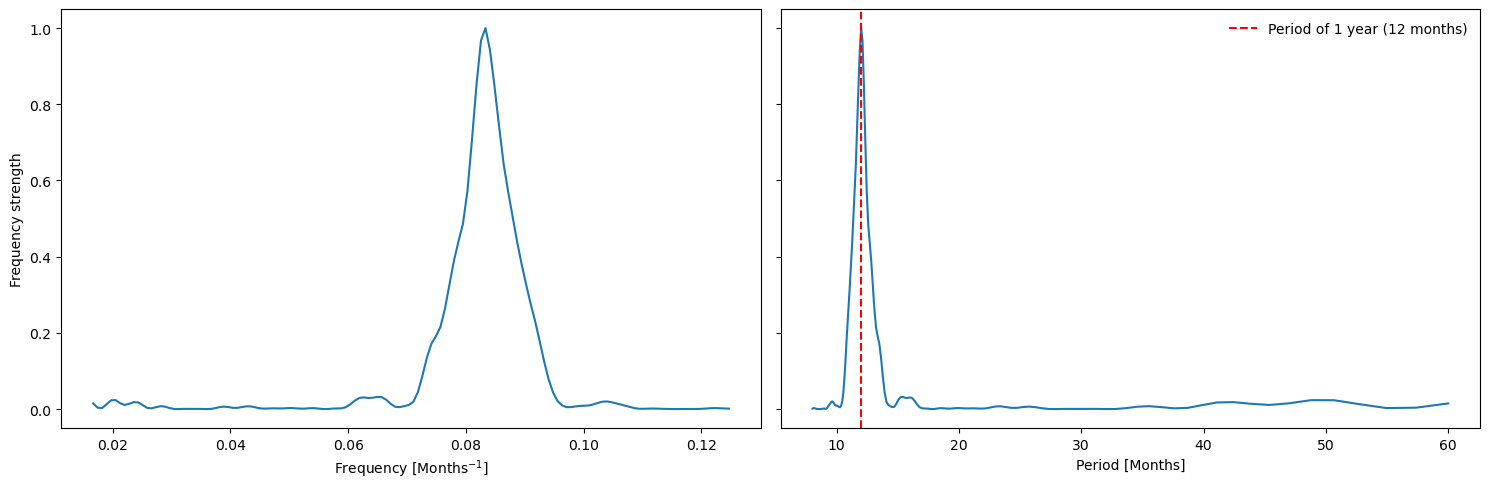

In [155]:
ls = LombScargle(t, mc_clean['All I Want for Christmas Is You: (United States)'], fit_mean=True, nterms=1)
freq, power = ls.autopower(
    minimum_frequency= 1/60,
    maximum_frequency=1/8,
    normalization='standard'  
)
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)
ax[0].plot(freq, power/np.max(power))
ax[0].set_xlabel(r'Frequency [Months$^{-1}$]')
ax[1].plot(1/freq, power/np.max(power))
ax[0].set_ylabel("Frequency strength")
ax[1].set_xlabel("Period [Months]")
plt.tight_layout()
ax[1].axvline(x = 12, color = 'red', linestyle = '--', label = 'Period of 1 year (12 months)')
ax[1].legend(frameon= False)

I chose a pretty easy one, but this data shows what I would have expected! I guessed that Google Searches for Mariah Carey's "All I Want for Christmas" would spike every December, therefore correlating to a period of 1 year. Indeed, this is actually more true that I would have expected. I find a maximum frequency at $0.083~\text{months}^{-1}$, which correlates to a period of **exactly** 12 months. 

I don't see much change in the periodicity from year to year. But, I do find it interesting to look at the time series data and see the amplitude increase in recent years. It seems that, in the years following 2016, interest in the song continued to spike in December, but reached new highs. 

In [184]:
pb = pd.read_csv('phoebe_bridgers.csv', index_col = None, header = 1)

In [185]:
pb['I Know The End: (United States)'] = pd.to_numeric(pb['I Know The End: (United States)'], errors='coerce')

In [186]:
pb_clean = pb[np.isnan(pb['I Know The End: (United States)']) == False]


In [227]:
pb_clean['Month'] = pd.to_datetime(pb_clean['Month'])
first_date = pb_clean['Month'].min() 
t= (pb_clean['Month'].dt.year - first_date.year) * 12 + (pb_clean['Month'].dt.month - first_date.month)

In [228]:
m = t > 195
t = t[m]
y = pb_clean['I Know The End: (United States)']
y = y[m]

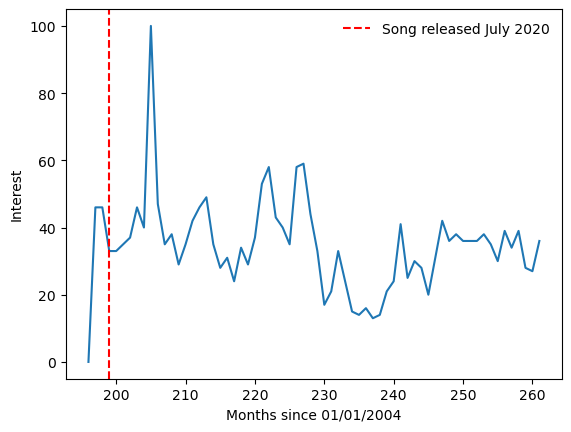

In [230]:
fig, ax = plt.subplots()
ax.plot(t, y)
plt.xlabel('Months since 01/01/2004')
plt.ylabel('Interest')
plt.axvline(x = 199, color = 'r', linestyle = '--', label = 'Song released July 2020')
ax.legend(frameon = False)

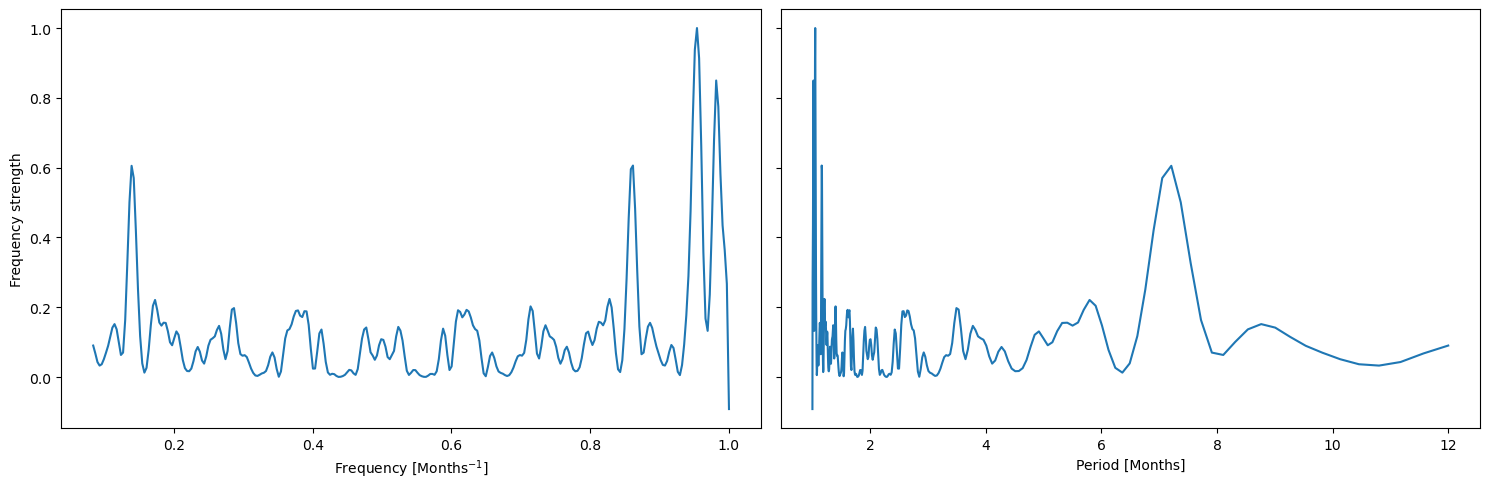

In [248]:
ls = LombScargle(t, y, fit_mean=True, nterms=1)
freq, power = ls.autopower(
    minimum_frequency= 1/12,
    maximum_frequency=1,
    normalization='standard'  
)
fig, ax = plt.subplots(1,2, figsize = (15,5), sharey = True)
ax[0].plot(freq, power/np.max(power))
ax[0].set_xlabel(r'Frequency [Months$^{-1}$]')
ax[1].plot(1/freq, power/np.max(power))
ax[0].set_ylabel("Frequency strength")
ax[1].set_xlabel("Period [Months]")
plt.tight_layout()
